In [18]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
from sklearn.datasets import load_wine
import mlgrad.pca as pca
from sklearn.preprocessing import robust_scale, scale

In [19]:
X0, Y = load_wine(return_X_y=True)
X0 = scale(X0)

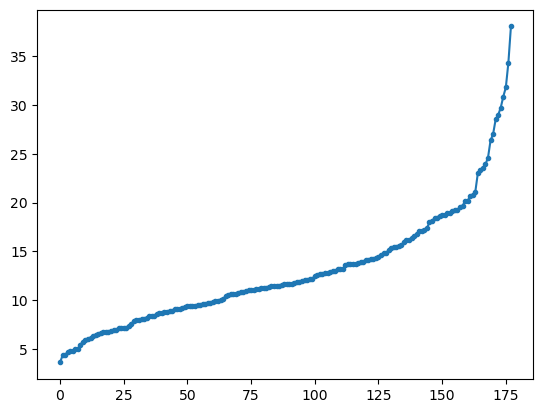

[ 7.84141790e-15  2.44498554e-16 -4.05917497e-15 -7.11041712e-17
 -2.49488320e-17 -1.95536471e-16  9.44313292e-16 -4.17892936e-16
 -1.54059038e-15 -4.12903170e-16  1.39838203e-15  2.12688793e-15
 -6.98567296e-17]


In [20]:
c0 = pca.find_center(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='o', markersize=3)
plt.show()
print(c0)

0.9213483146067416
[ 7.84141790e-15  2.44498554e-16 -4.05917497e-15 -7.11041712e-17
 -2.49488320e-17 -1.95536471e-16  9.44313292e-16 -4.17892936e-16
 -1.54059038e-15 -4.12903170e-16  1.39838203e-15  2.12688793e-15
 -6.98567296e-17]


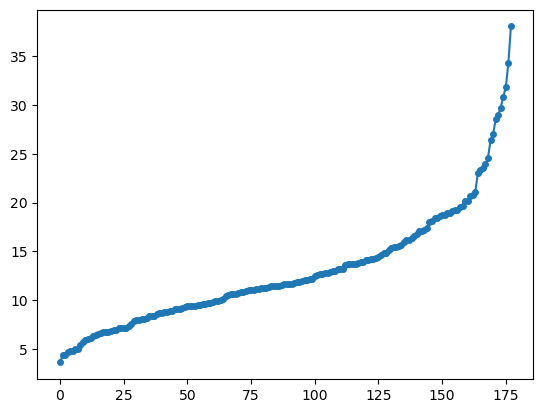

In [21]:
N = len(X0)
alpha = (N - 14) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=alpha)
c = pca.find_rob_center(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='o', markersize=4)
plt.show()

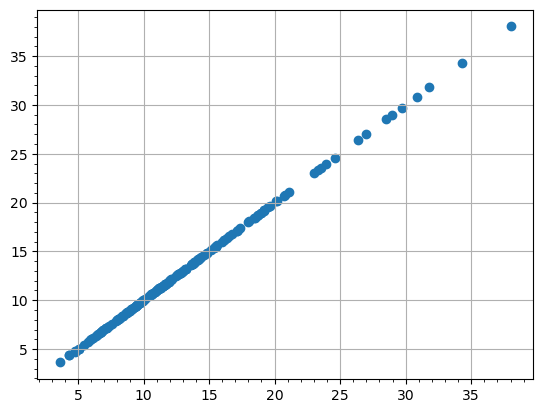

In [22]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [23]:
X1 = X0 - c

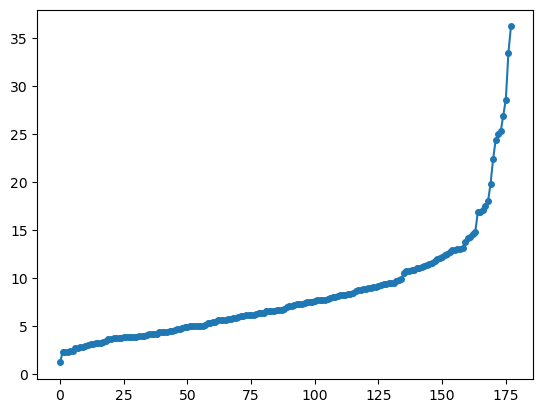

837.641345032295 [ 0.14432941 -0.24518757 -0.00205105 -0.23932041  0.14199205  0.39466085
  0.4229343  -0.2985331   0.31342949 -0.08861669  0.29671456  0.37616741
  0.28675224]


In [24]:
a1_0, L1_0 = pca.find_pc(X1)
plt.plot(sorted(pca.distance_line(X0, a1_0)), marker='o', markersize=4)
plt.show()
print(L1_0, a1_0)

0.9213483146067416
4.698965629885141 [ 0.17278643 -0.24254184 -0.01547706 -0.26987265  0.10211385  0.39642349
  0.42160728 -0.29653089  0.30521263 -0.0679689   0.28632328  0.37254694
  0.29400454]


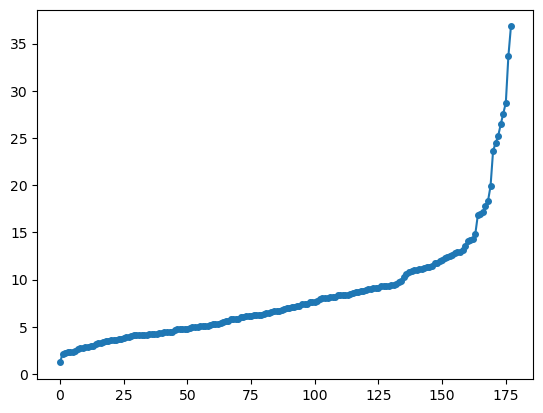

In [32]:
N = len(X0)
alpha = (N - 14) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(1.0), alpha=alpha)
a1, L1 = pca.find_rob_pc(X1, wma)
print(L1, a1)
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4)
plt.show()
U1 = pca.project_line(X0, a1)
U1_0 = pca.project_line(X0, a1_0)

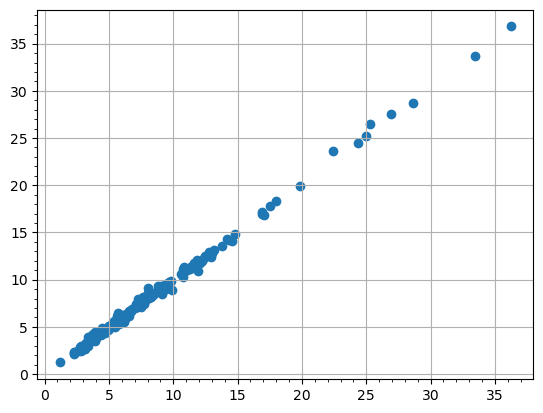

In [33]:
plt.scatter(pca.distance_line(X1, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [34]:
X2 = pca.project(X1, a1)

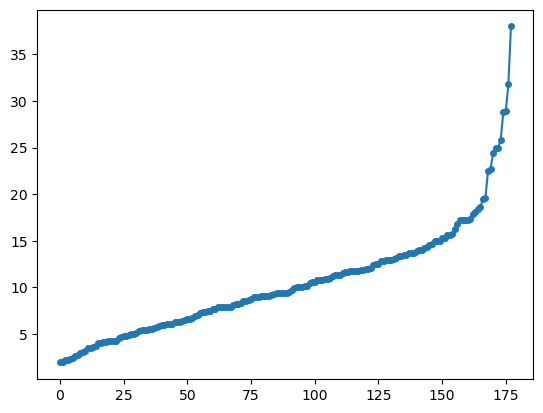

444.5559481607282 [ 0.48188965  0.22866947  0.31531333 -0.00780831  0.29640403  0.05885412
 -0.01002143  0.03338072  0.03417702  0.53163222 -0.28398066 -0.17042036
  0.36053614]


In [35]:
a2_0, L2_0 = pca.find_pc(X2)
plt.plot(sorted(pca.distance_line(X0, a2_0)), marker='o', markersize=4)
plt.show()
print(L2_0, a2_0)

0.9325842696629213


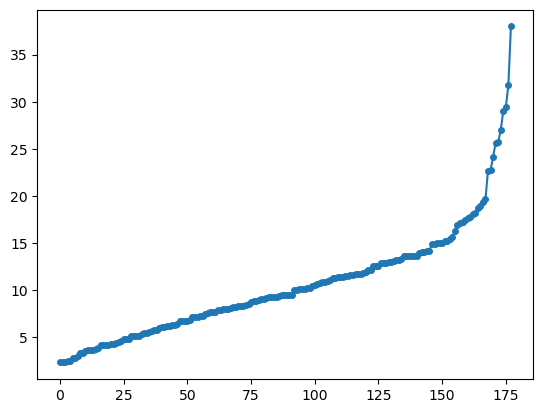

2.518374479217282 [ 0.47992307  0.23554898  0.24332787 -0.0455197   0.29128263  0.05265946
 -0.02832477 -0.0110822   0.05933374  0.54973355 -0.32318121 -0.18006093
  0.34895676]


In [36]:
N = len(X0)
alpha = (N - 12) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(1.0), alpha=alpha)
a2, L2 = pca.find_rob_pc(X2, wma)
plt.plot(sorted(pca.distance_line(X0, a2)), marker='o', markersize=4)
plt.show()
print(L2, a2)
U2 = pca.project_line(X0, a2)
U2_0 = pca.project_line(X0, a2_0)

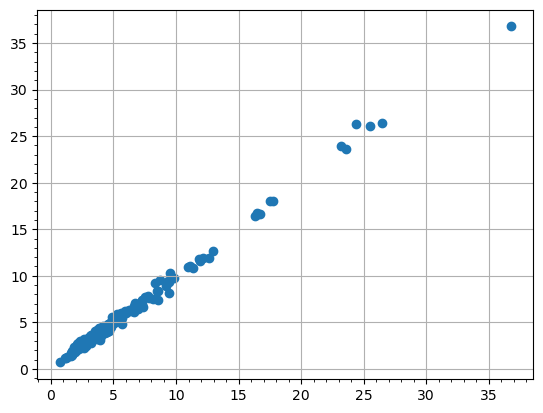

In [37]:
plt.scatter(pca.distance_line(X2, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [38]:
from sklearn.decomposition import PCA

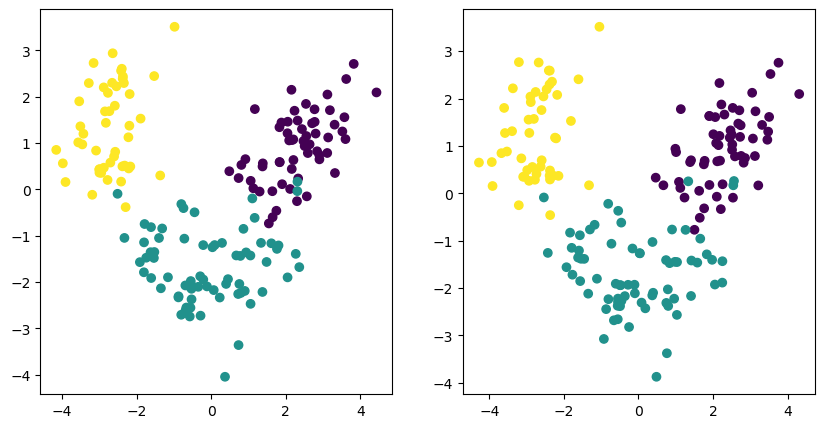

In [39]:
pca1 = PCA()
pca1.fit(X0)
U = pca1.transform(X0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U1, U2, c=Y)
plt.subplot(1,2,2)
plt.scatter(U[:,0], -U[:,1], c=Y)
plt.show()

In [ ]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [ ]:
S = robust_scatter_matrix(X1, wma)
# print(S)

In [ ]:
L, A = np.linalg.eig(S)
print(A)